# Modelagem de Séries Temporais com SARIMA em Python

## Objetivo da Aula



Nesta aula, vamos explorar como modelar e prever séries temporais utilizando o modelo **SARIMA (Seasonal AutoRegressive Integrated Moving Average)** no Python. O código fornecido servirá como base para ilustrar os conceitos teóricos e práticos envolvidos na análise e previsão de séries temporais.

## 1. Introdução às Séries Temporais

Uma série temporal é uma sequência de observações ordenadas no tempo. Exemplos incluem:

- Vendas mensais
- Temperatura diária
- Cotações de ações
- Número de visitantes por hora

### Características comuns:
- **Tendência**: comportamento de longo prazo (crescente, decrescente ou estável).
- **Sazonalidade**: padrões repetitivos ao longo de um período fixo (ex.: vendas aumentam nas festas de fim de ano).
- **Ciclos/Estacionalidade não fixa**: padrões que se repetem mas sem um período constante.
- **Ruído/Erros aleatórios**: variações imprevisíveis.

## 2. Preparação dos Dados

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import warnings

📚 **Finalidade das Bibliotecas Utilizadas**

| **Biblioteca / Módulo** | **Importação**                                      | **Finalidade**                                                                                     | **Exemplo de Uso**                                     |
|------------------------|------------------------------------------------------|-----------------------------------------------------------------------------------------------------|--------------------------------------------------------|
| **Pandas**             | `import pandas as pd`                               | Manipular dados em formato de tabelas (DataFrame) e séries temporais                              | Criar um DataFrame com datas e valores                 |
| **NumPy**              | `import numpy as np`                                | Realizar operações matemáticas avançadas com arrays                                               | Calcular média, desvio padrão ou MSE                   |
| **Seasonal Decompose** | `from statsmodels.tsa.seasonal import seasonal_decompose` | Decompor uma série temporal em tendência, sazonalidade e resíduo                                  | Analisar os componentes de uma série temporal          |
| **SARIMAX**            | `from statsmodels.tsa.statespace.sarimax import SARIMAX` | Modelar e prever séries temporais com sazonalidade (modelo SARIMA/SARIMAX)                        | Treinar um modelo para prever vendas futuras           |
| **Matplotlib.pyplot**  | `import matplotlib.pyplot as plt`                   | Visualizar dados e resultados (gráficos)                                                          | Plotar gráficos de previsão vs. real                   |
| **Warnings**           | `import warnings`                                   | Controlar mensagens de alerta do Python                                                           | Ignorar avisos durante o ajuste do modelo              |


In [2]:
##
# Gera um array contendo 24 datas
##
#dates = pd.date_range('2022-01-01', periods=12, freq='MS')  # 12 meses
dates = pd.date_range('2022-01-01', periods=48, freq='MS')  # 24 meses

##
# Gera um array com 24 valores
##
#values = [100, 120, 115, 130, 140, 200, 180, 190, 170, 165, 210, 220,
#          105, 125, 110, 135, 145, 205, 185, 195, 175, 160, 215, 225]
values = [100 + i * 2 + 20 * (i % 12 == 0) for i in range(48)]


##
# Cria um novo dataset
##
df = pd.DataFrame({'date': dates, 'value': values})
df.set_index('date', inplace=True)

# Definindo frequência explicitamente (opcional, mas evita o aviso)
#df.index = df.index.asfreq('MS')



print(f"\n\nInformações sobre o dataset \n\n\t")
df.info()

print(f"\n\nPrimeiras linhas do dataset\n\t")
df.head(5)



Informações sobre o dataset 

	
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2022-01-01 to 2025-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   48 non-null     int64
dtypes: int64(1)
memory usage: 768.0 bytes


Primeiras linhas do dataset
	


,value
date,
2022-01-01,120
2022-02-01,102
2022-03-01,104
2022-04-01,106
2022-05-01,108


#### Explicação



-  `df = pd.DataFrame({'date': dates, 'value': values})` 
    - criar um DataFrame no Pandas contendo duas colunas: `
        - 'date'`, com as datas geradas pela função `pd.date_range()`, 
        - `'value'`, com os valores da série temporal; 
        
-  `df.set_index('date', inplace=True)` 
    - define a coluna `'date'` como índice do DataFrame, o que é essencial para trabalhar com séries temporais no Pandas, pois permite realizar operações alinhadas no tempo, como análise de tendências, resampling e modelagem com métodos como SARIMA.    

## 3. Decomposição da Série Temporal

In [3]:
result = seasonal_decompose(df['value'], model='additive', period=12)

### 📈 O que é decomposição?

A decomposição separa a série original em suas componentes principais:

- **Tendência (Trend)**: direção geral da série.
- **Sazonalidade (Seasonality)**: padrão repetitivo dentro do período definido.
- **Resíduo (Residual)**: parte aleatória da série após remover tendência e sazonalidade.

Parâmetros do `seasonal_decompose`:

- **`model='additive'`**: 
    - Supõe que a sazonalidade e a tendência são somadas à componente residual. 
    - Ideal para séries com amplitude constante.

- **`period=12`**: 
    - Define o período sazonal (12 meses).


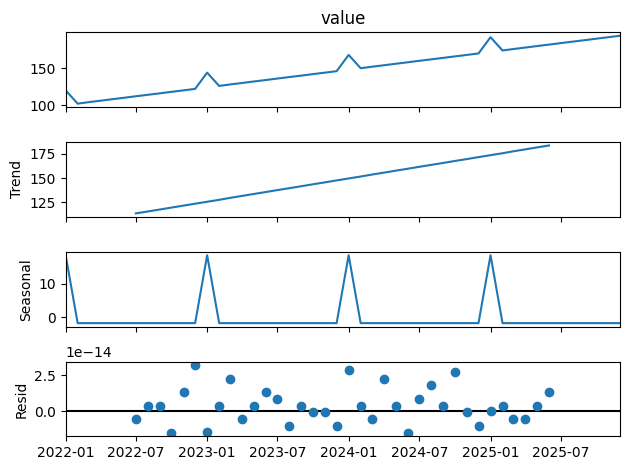

In [4]:
result.plot()
plt.tight_layout()
plt.show()

### 🔖 Explicação

O objetivo do comando `result.plot()` é gerar uma visualização dos componentes decompostos de uma série temporal (tendência, sazonalidade e resíduo), facilitando a análise visual de cada parte da série separadamente; 

Os comandos `plt.tight_layout()` e `plt.show()` são usados para melhorar o layout do gráfico — ajustando automaticamente o espaçamento entre os subgráficos para evitar sobreposições — e exibir o resultado final na tela, respectivamente. 

Esses comandos são úteis para interpretar o comportamento da série ao longo do tempo e identificar padrões como sazonalidade clara ou tendências crescentes/decrescentes.

O Statsmodels gera **um gráfico com quatro subplots**, cada um mostrando uma das componentes da série temporal:

1. **Original** – A série temporal original (`df['value']`)
2. **Trend** – A componente de tendência estimada
3. **Seasonal** – A componente sazonal estimada
4. **Residual** – A componente residual (ruído)

Se você tiver uma série mensal com dados de vendas, o gráfico mostrará algo assim:

- **Na primeira linha**: a curva dos valores reais (original).
- **Na segunda linha**: a curva da tendência — talvez crescendo gradualmente.
- **Na terceira linha**: a curva da sazonalidade — talvez aumentando a cada 12 meses.
- **Na quarta linha**: os resíduos — pequenas variações aleatórias.

🧠 Por que isso é útil?

- **Identificar padrões**: Ajuda a reconhecer se há tendências claras ou sazonalidades fortes na sua série.

- **Avaliar qualidade do modelo**: Se os resíduos forem muito grandes ou não aleatórios, pode indicar que a decomposição não capturou bem a estrutura da série.

- **Tomada de decisão**: Com base nos gráficos, você pode decidir por exemplo:
  - Se deve incluir sazonalidade no seu modelo SARIMA.
  - Se precisa transformar a série para estacionariedade.
  - Se há outliers ou anomalias no dado.

⚠️ Observações Importantes

- **Requer matplotlib instalado**. 
  - Certifique-se de que ele está instalado (`pip install matplotlib`) caso contrário, o plot não será gerado.

- **Funciona melhor com dados reais ou com pelo menos 2 ciclos completos** 
  - Com poucos pontos, os gráficos podem não ser representativos.

- No Jupyter Notebook, o gráfico aparece automaticamente. Em scripts `.py`, você pode precisar usar `plt.show()`.


### Melhorando os gráficos

In [5]:
help(result)

Help on DecomposeResult in module statsmodels.tsa.seasonal object:

class DecomposeResult(builtins.object)
 |  DecomposeResult(observed, seasonal, trend, resid, weights=None)
 |  
 |  Results class for seasonal decompositions
 |  
 |  Parameters
 |  ----------
 |  observed : array_like
 |      The data series that has been decomposed.
 |  seasonal : array_like
 |      The seasonal component of the data series.
 |  trend : array_like
 |      The trend component of the data series.
 |  resid : array_like
 |      The residual component of the data series.
 |  weights : array_like, optional
 |      The weights used to reduce outlier influence.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, observed, seasonal, trend, resid, weights=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  plot(self, observed=True, seasonal=True, trend=True, resid=True, weights=False)
 |      Plot estimated components
 |      
 |      Parameters
 |      ----------
 |      

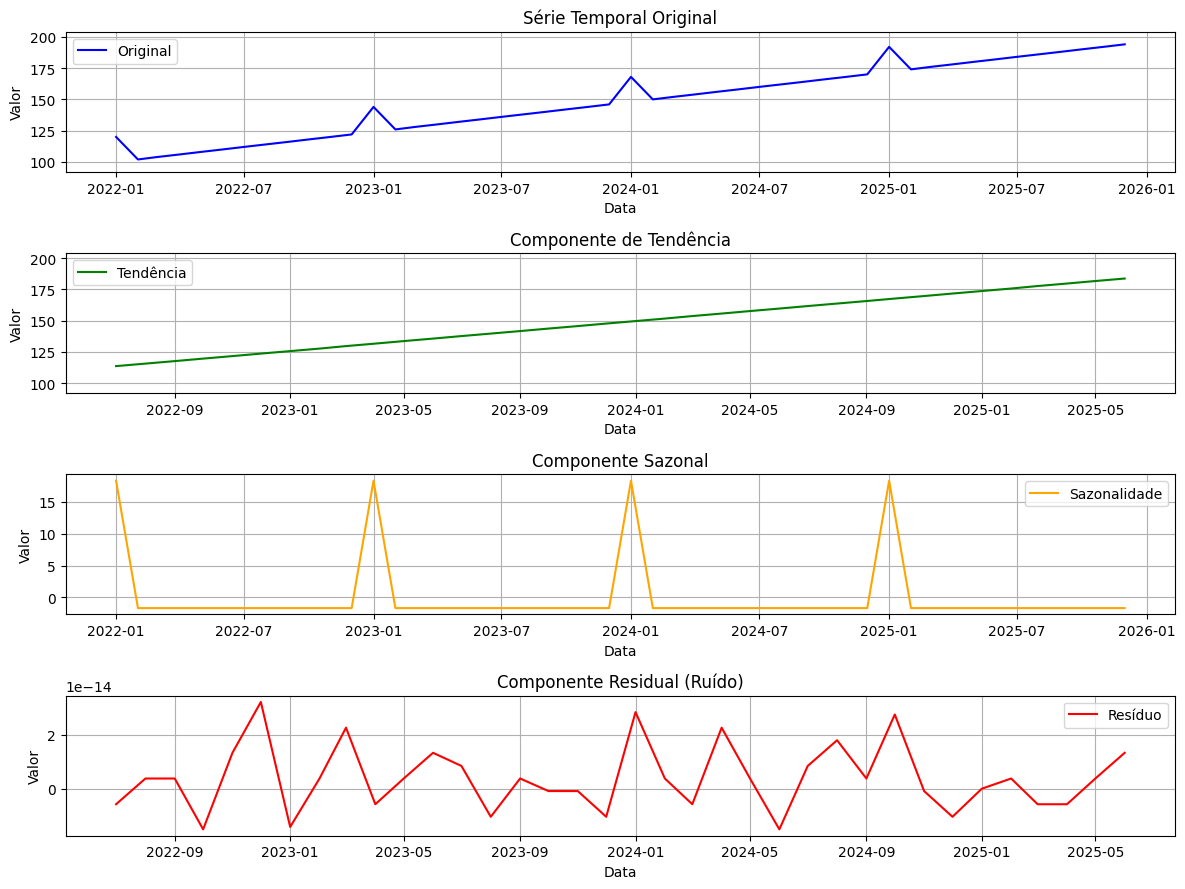

In [6]:
# Plotar resultados com melhorias de visualização
# definir o tamanho da figura (ou janela) onde o gráfico será exibido, 
# com largura de 12 polegadas e altura de 9 polegadas
plt.figure(figsize=(12, 9))  

# Gráfico original
# Dividir a figura em uma grade de 4 linhas e 1 coluna , 
# e selecionar a primeira posição dessa grade para plotar um gráfico
plt.subplot(4, 1, 1)
plt.plot(df.index, df['value'], label='Original', color='blue')
plt.title('Série Temporal Original')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.ylim(df['value'].min() - 10, df['value'].max() + 10) 

# Gráfico de tendência
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendência', color='green')
plt.title('Componente de Tendência')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.ylim(df['value'].min() - 10, df['value'].max() + 10) 

# Gráfico de sazonalidade
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Sazonalidade', color='orange')
plt.title('Componente Sazonal')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

# Gráfico de resíduo
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Resíduo', color='red')
plt.title('Componente Residual (Ruído)')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

# Ajustar layout
plt.tight_layout()
plt.rcParams['figure.dpi'] = 300
plt.show()

## 4. Divisão em Treino e Teste

In [7]:
train = df.iloc[:-6]
test = df.iloc[-6:]

### Justificativa:

- Dividimos a série em dois conjuntos:
  - **Treino (`train`)**: usado para treinar o modelo (neste caso, os primeiros 21 meses).
  - **Teste (`test`)**: usado para avaliar o desempenho do modelo (últimos 3 meses).
  
O objetivo dos comandos train = df.iloc[:-3] e test = df.iloc[-3:] é separar o conjunto de dados em duas partes
- uma para treinamento (train) e outra para teste (test). 
- O comando iloc[:-3] seleciona todas as linhas do DataFrame exceto as três últimas, que serão usadas como dados de teste.
- Enquanto iloc[-3:] seleciona apenas as três últimas linhas para avaliação do modelo. 
- Essa divisão é comum em modelagem de séries temporais, onde os dados mais recentes são reservados para verificar a capacidade do modelo de prever valores futuros.

In [8]:
print (f"\n\nTreino : {train.shape}")
print(f"Teste  : {test.shape}\n")





Treino : (42, 1)
Teste  : (6, 1)



## 5. Modelo SARIMA

### O que é SARIMA?

O **SARIMA** é uma extensão do ARIMA (AutoRegressive Integrated Moving Average) para séries com sazonalidade. Ele tem duas partes:

- **Parte não-sazonal (order)**: `(p, d, q)`
- **Parte sazonal (seasonal_order)**: `(P, D, Q, m)`

In [9]:
sarima_model = SARIMAX(
    train['value'],
    order=(1,1,1),
    seasonal_order=(0, 1, 0, 12), 
    enforce_stationarity=False,
    enforce_invertibility=False
)

#sarima_fit = sarima_model.fit(disp=False)
#print(sarima_fit.summary())

# Ignorando warning temporariamente (opcional)
with warnings.catch_warnings():
   warnings.simplefilter("ignore")
   results = sarima_model.fit(disp=False, maxiter=1000)

#print(results.summary())

c:\_mlUc1\mlEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\_mlUc1\mlEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### 🔖 Parâmetros explicados:

O objetivo do comando `sarima_model = SARIMAX(...)` é **configurar e definir um modelo estatístico SARIMA (Seasonal Autoregressive Integrated Moving Average)** para análise e previsão de séries temporais com sazonalidade. Este modelo é especificado com os seguintes parâmetros:  

- `train['value']`: 
  - indica que o modelo será treinado com a série temporal da coluna `'value'` do conjunto de treino;  

- `order=(1,1,1)`: 
  - define a parte não sazonal do modelo, onde `p=1` (autoregressivo), `d=1` (diferenciação para tornar a série estacionária) e `q=1` (média móvel);
  - `p=1`: número de termos autorregressivos não-sazonais.
  - `d=1`: grau de diferenciação (para tornar a série estacionária).
  - `q=1`: número de termos média móvel não-sazonais.  

- `seasonal_order=(0,1,0,12)`: 
  - define a parte sazonal, com `P=0`, `D=1` (diferenciação sazonal), `Q=0` e período `m=12` (indicando padrão anual, como em dados mensais);  
  - `P=0`: número de termos autorregressivos sazonais.
  - `D=1`: grau de diferenciação sazonal.
  - `Q=1`: número de termos média móvel sazonal.
  - `m=12`: período sazonal (12 meses no nosso exemplo).

- `enforce_stationarity=False` e `enforce_invertibility=False`: 
  - permitem relaxar restrições matemáticas durante o ajuste, facilitando a convergência do modelo mesmo com dados mais complexos. Útil quando a série não é claramente estacionária.

Essa etapa prepara o modelo para ser treinado nos dados de treino na próxima etapa.

###  ☄️ ValueWarning: No frequency information was provided, so inferred frequency MS will be used.

É gerado pelo `statsmodels` quando ele detecta que a sua série temporal (DataFrame) **não tem uma frequência explícita definida** no índice de datas (`DatetimeIndex`), mas ainda assim é possível inferir qual seria essa frequência com base na sequência das datas.

🧠 O que significa esse aviso?

- O código está usando um `pd.DatetimeIndex`, o que é bom para séries temporais.
- Mas o índice não contém informação sobre a **frequência do tempo** (ex.: "mensal", "diária", "trimestral").
- Como a sequência de datas é mensal (`MS` = início do mês), o `statsmodels` **infez automaticamente** que a frequência é mensal (`MS`).
- Ele apenas **avisa** isso, sem causar erro.

✅ Como resolver ou evitar esse aviso?

**Opção 1: Definir a frequência explicitamente**

Você pode definir a frequência do índice da série temporal adicionando `.asfreq('MS')` ou `.asfreq(freq='MS')`.

Exemplo:

```python
df.index = df.index.asfreq('MS')
```

Isso define explicitamente que a frequência é **mensal**, começando em cada mês (`MS`).


**Opção 2: Usar `infer_freq=True` ao criar o DataFrame**

Se estiver criando os dados manualmente com `pd.date_range`, pode usar o parâmetro `freq='MS'` desde o início:

```python
dates = pd.date_range('2022-01-01', periods=24, freq='MS')  # Frequência definida logo no início
df = pd.DataFrame({'date': dates, 'value': values})
df.set_index('date', inplace=True)
```

Nesse caso, o índice já terá a frequência correta e o aviso não será exibido.

**Opção 3: Ignorar o aviso (não recomendada)**

Se quiser ignorar o aviso (apenas para testes ou visualização), pode usar:

```python
import warnings
warnings.filterwarnings("ignore", category=ValueWarning)
```

Mas isso **não é recomendado** para análises reais, pois pode mascarar outros avisos importantes.



## 6. Treinamento do Modelo

In [10]:
sarima_fit = sarima_model.fit(disp=False)

#### Explicação 

- **`fit()`** ajusta o modelo aos dados de treino.
- **`disp=False`** evita exibir mensagens de convergência durante o treinamento.

## 7. Previsão com o Modelo

In [11]:
pred = sarima_fit.forecast(steps=len(test))

O objetivo do comando `pred = sarima_fit.forecast(steps=len(test))` é:
- realizar previsões futuras com base no modelo SARIMA já ajustado (`sarima_fit`), 
- prevendo uma quantidade de períodos igual ao tamanho do conjunto de teste (`len(test)`). 
- Isso significa que o modelo usa os dados históricos de treino para estimar quais seriam os valores futuros da série temporal nos próximos steps intervalos (no caso, os últimos 3 meses reservados no conjunto de teste), 
- gerando assim uma previsão que pode ser comparada diretamente com os valores reais para avaliar a performance do modelo.

- **`forecast(steps=3)`** gera previsões para os próximos 3 períodos (meses).
- **`pred`** conterá os valores previstos pelo modelo.

In [12]:
print("\n=== Previsão SARIMA ===")
print(pred)


=== Previsão SARIMA ===
2025-07-01    184.0
2025-08-01    186.0
2025-09-01    188.0
2025-10-01    190.0
2025-11-01    192.0
2025-12-01    194.0
Freq: MS, Name: predicted_mean, dtype: float64


## 8. Avaliação do Modelo

In [13]:
mse = np.mean((pred - test['value'])**2)
print(f"Erro quadrático médio (MSE): {mse:.2f}")

Erro quadrático médio (MSE): 0.00


`mse = np.mean((pred - test['value'])**2)`
- calcula o Erro Quadrático Médio (Mean Squared Error - MSE) entre os valores previstos pelo modelo SARIMA (pred) e os valores reais do conjunto de teste (test['value']). 
- Esse cálculo mede a média dos quadrados das diferenças entre as previsões e os valores observados, fornecendo uma métrica numérica que indica quão precisa foi a previsão do modelo
- quanto menor o valor do MSE, mais próximas as previsões estão dos valores reais, indicando um melhor desempenho do modelo na tarefa de previsão.


## 9. Gerando um gráfico com os dados reais de treino e teste em uma única série

In [14]:
# Concatenar os dados reais de treino e teste em uma única série
full_data = pd.concat([train, test])
full_data['forecast'] = [np.nan] * len(train) + pred.values.tolist()


O objetivo dos comandos é unir os dados de treino e teste em um único DataFrame (full_data) e adicionar uma nova coluna chamada 'forecast' que armazena as previsões do modelo ao longo de todo o período, alinhadas com as datas originais. 

- `[np.nan] * len(train)` cria valores nulos (NaN) para preencher a parte dos dados de treino (onde não há previsão), 
- `pred.values.tolist()` insere os valores previstos nas posições correspondentes aos dados de teste, permitindo assim visualizar ou comparar facilmente os valores reais com as previsões do modelo no mesmo gráfico ou tabela .

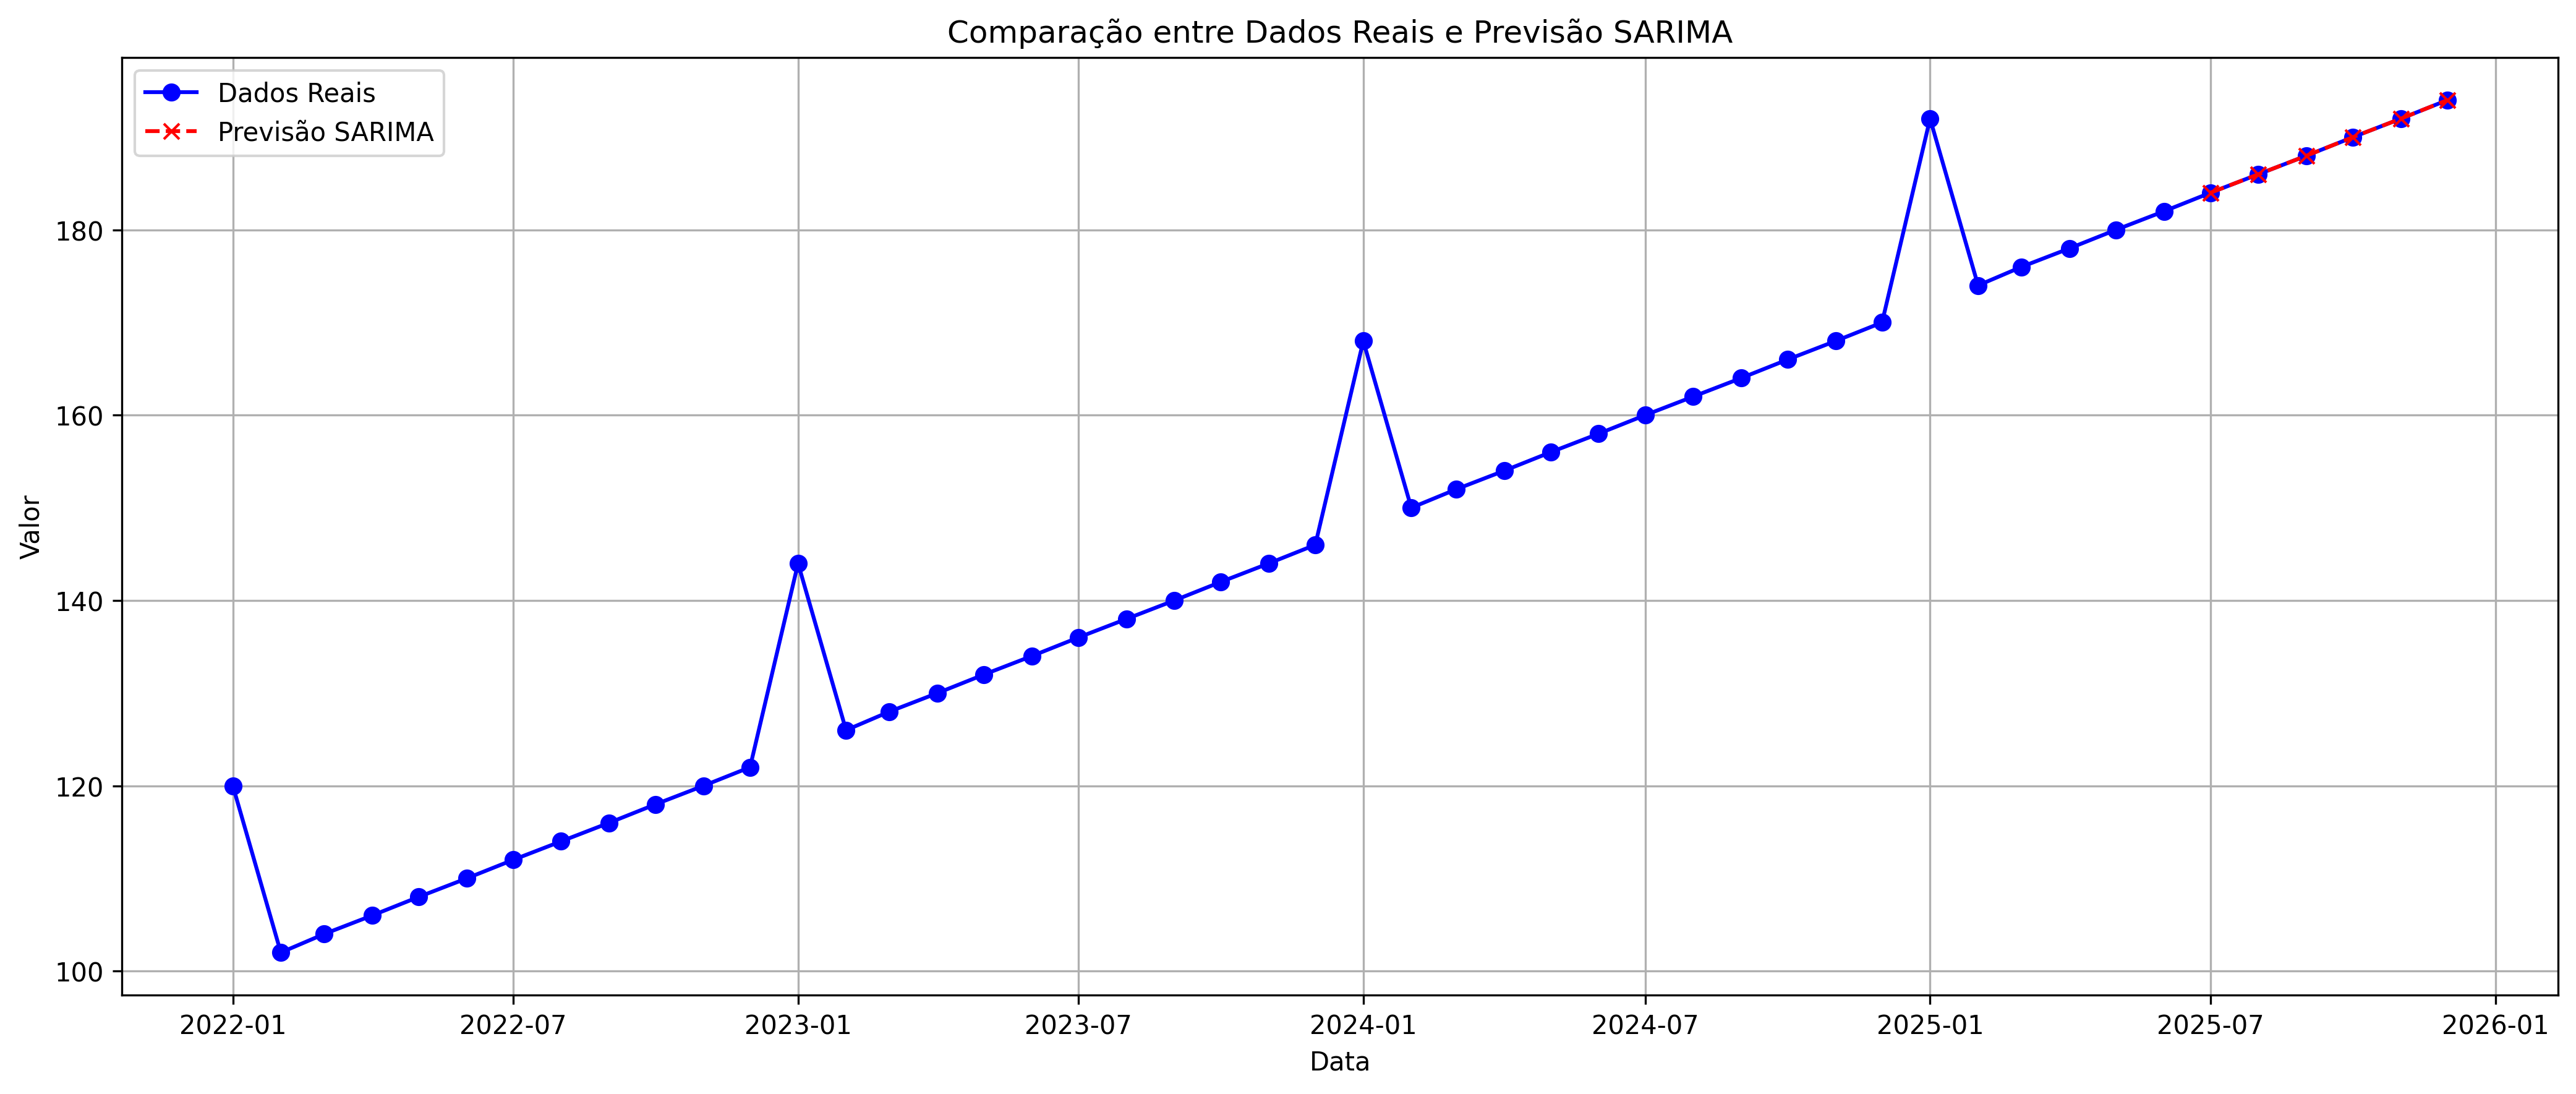

In [15]:
# Plotar gráfico comparando real vs. previsão
plt.figure(figsize=(14, 6))
plt.plot(full_data.index, full_data['value'], label='Dados Reais', color='blue', marker='o')
plt.plot(full_data.index, full_data['forecast'], label='Previsão SARIMA', color='red', linestyle='--', marker='x')

# Adicionar título e legendas
plt.title('Comparação entre Dados Reais e Previsão SARIMA')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

# Melhorar layout
plt.tight_layout()
plt.show()

### Versão melhorada do Gráfico

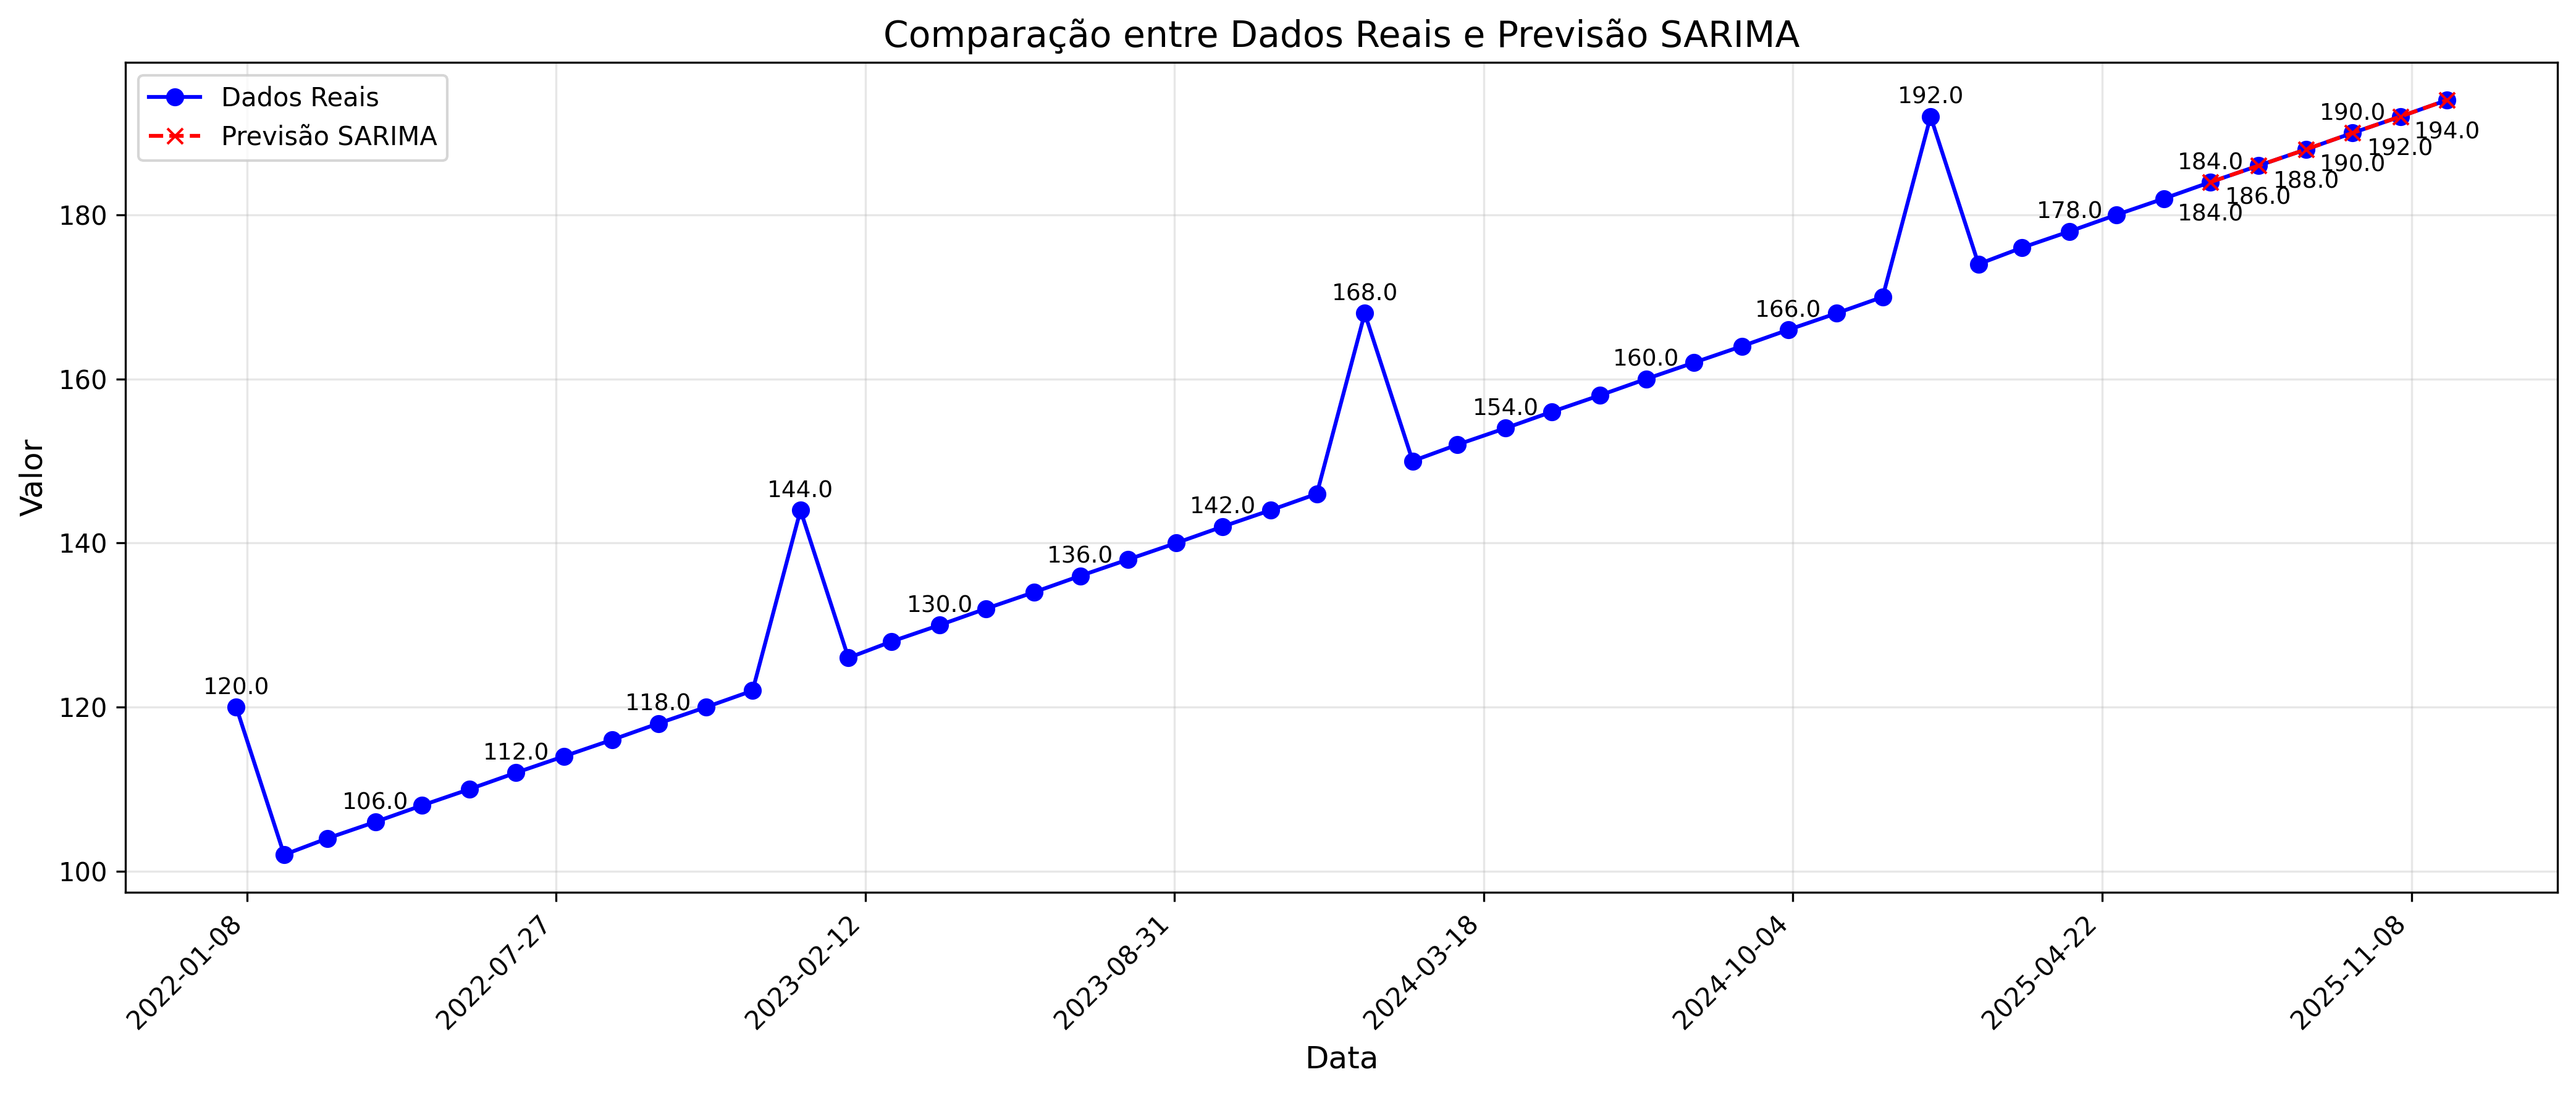

In [16]:
# Função para anotar valores no gráfico
def annotate_values(ax, data, offset=(0, 5), fontsize=9, step=1):
    for i, (idx, val) in enumerate(data.items()):
        if i % step == 0:
            ax.annotate(f'{val:.1f}', 
                          xy=(idx, val), 
                          textcoords='offset points', 
                          xytext=offset, 
                          ha='center',
                          fontsize=fontsize,
                          color='black')

# Plotar gráfico com valores sobrepostos aos pontos
plt.figure(figsize=(14, 6))

# Plotar dados reais e previsões
ax = plt.gca()
ax.plot(full_data.index, full_data['value'], label='Dados Reais', color='blue', marker='o', linestyle='-')
ax.plot(full_data.index, full_data['forecast'], label='Previsão SARIMA', color='red', marker='x', linestyle='--')

# Anotar valores dos dados reais
annotate_values(ax, full_data['value'], offset=(0, 5), step=3)

# Anotar valores da previsão
annotate_values(ax, full_data['forecast'].dropna(), offset=(0, -15), step=1)

# Formatar o eixo x
ax.xaxis.set_major_locator(plt.MaxNLocator(8))  # Limita o número de rótulos
plt.xticks(rotation=45, ha='right')

# Títulos e legendas
plt.title('Comparação entre Dados Reais e Previsão SARIMA', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Ajustar layout final
plt.tight_layout()
plt.show()

## Prevendo mais 3 meses após o final dos dados

In [17]:
# Prever mais 3 meses após o último dado
forecast_steps = 3

forecast = results.get_forecast(steps=forecast_steps)

forecast_index = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='MS')[1:]

forecast_values = forecast.predicted_mean


#forecast.prediction_results.forecasts
#help (forecast)

O objetivo do código é **realizar uma previsão de valores futuros da série temporal** para um número específico de períodos à frente (neste caso, `3` meses), usando um modelo já ajustado (`results`).  

- `forecast = results.get_forecast(steps=forecast_steps)`  
  → Gera a previsão para os próximos 3 meses.  

- `forecast_index = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='MS')[1:]`  
  → Cria as datas futuras correspondentes às previsões, começando após a última data do conjunto original.  

- `forecast_values = forecast.predicted_mean`  
  → Extrai os valores médios previstos pelo modelo para esses novos períodos.  

Esse código é útil para **estender a previsão além dos dados de teste**, simulando como o modelo se comportaria em cenários futuros reais.

In [18]:
print(forecast_values)

2025-07-01    184.0
2025-08-01    186.0
2025-09-01    188.0
Freq: MS, Name: predicted_mean, dtype: float64


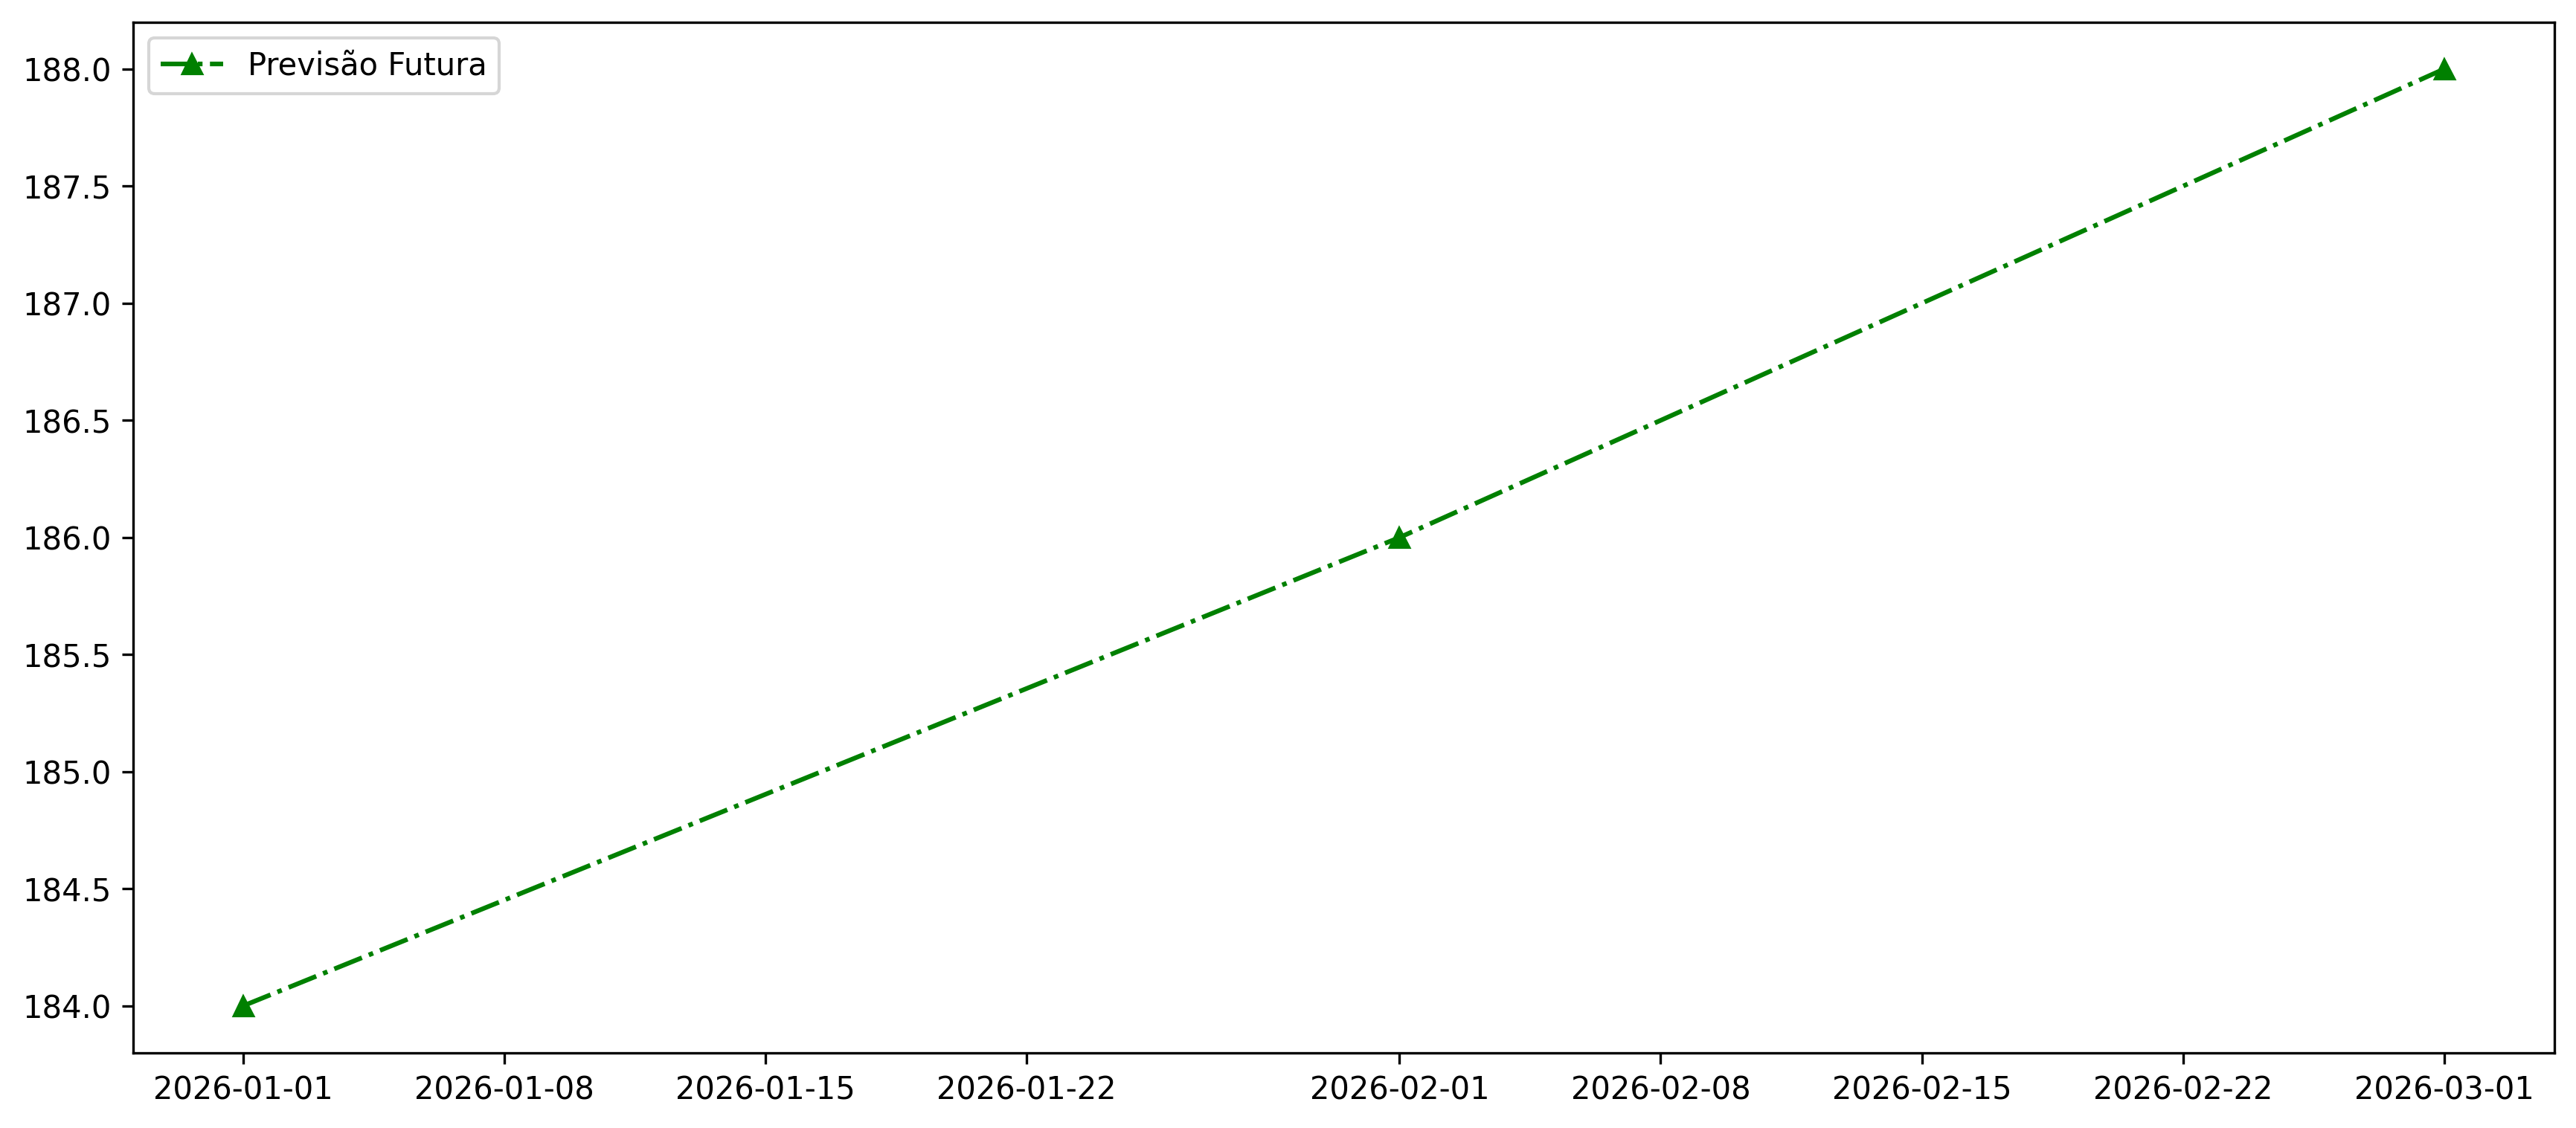

In [19]:
# Plotar a previsão estendida
plt.figure(figsize=(14, 6))
plt.plot(forecast_index, forecast_values, label='Previsão Futura', color='green', linestyle='-.', marker='^')
plt.legend()
plt.show()

### Melhorando a visualização

C:\Users\isabel.barboza\AppData\Local\Temp\ipykernel_31952\2767059610.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(f'{values[i]:.2f}',
C:\Users\isabel.barboza\AppData\Local\Temp\ipykernel_31952\2767059610.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(index[i], values[i]),


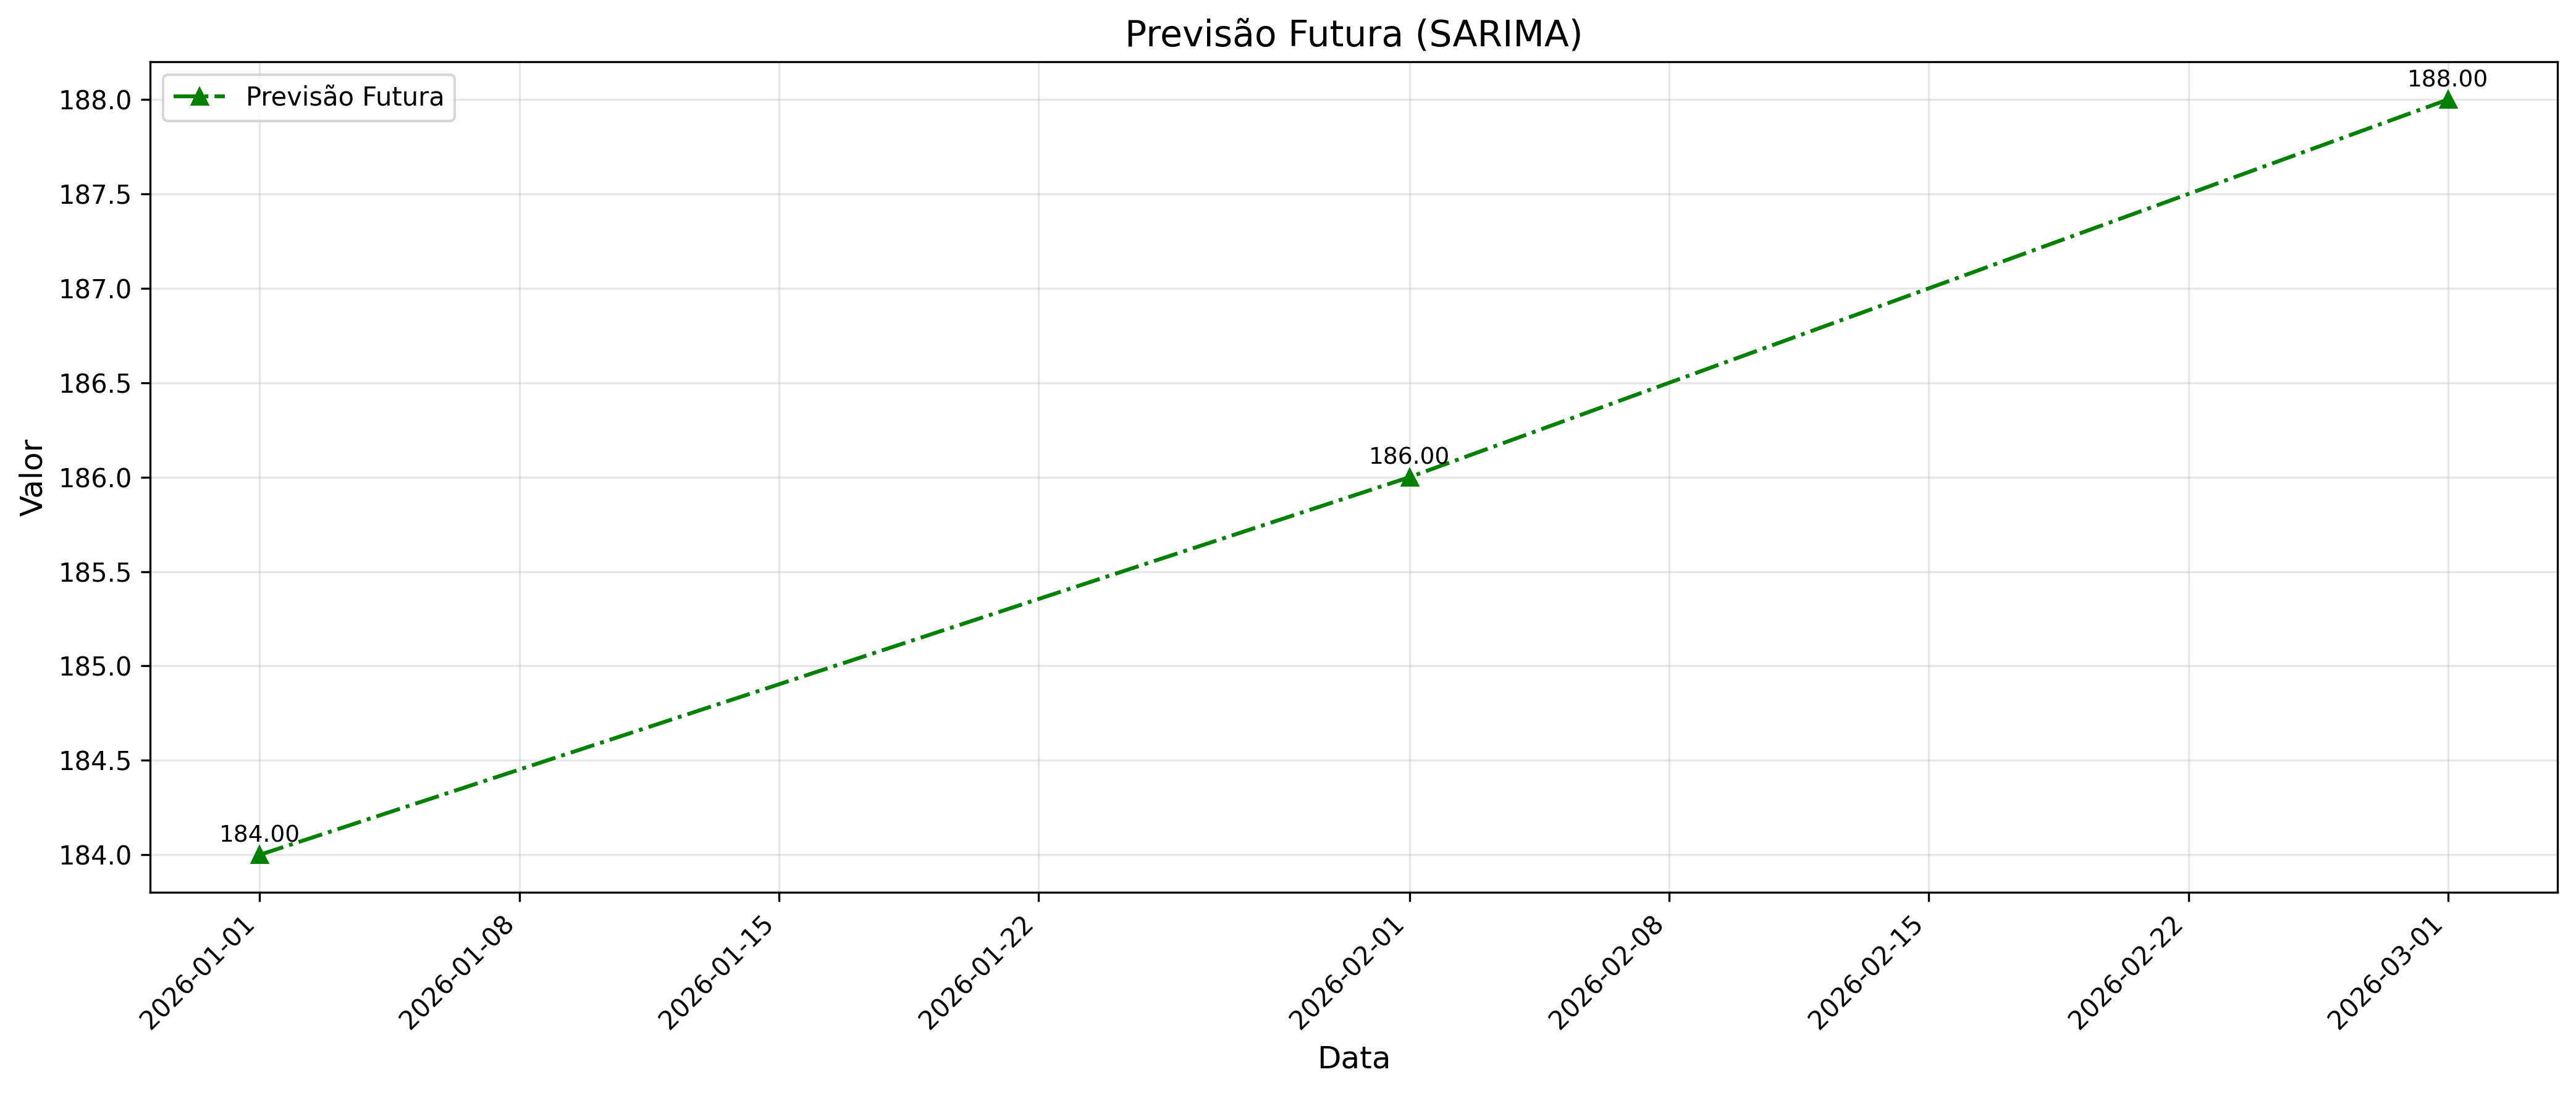

In [20]:
# Função para anotar valores nos pontos
def annotate_forecast(ax, index, values, offset=(0, 5), fontsize=9):
    for i in range(len(values)):
        ax.annotate(f'{values[i]:.2f}',
                    xy=(index[i], values[i]),
                    textcoords='offset points',
                    xytext=offset,
                    ha='center',
                    fontsize=fontsize,
                    color='black')

# Plotar a previsão estendida com valores sobrepostos
plt.figure(figsize=(14, 6))
ax = plt.gca()

# Plotar a linha da previsão futura
ax.plot(forecast_index, forecast_values, label='Previsão Futura', color='green', linestyle='-.', marker='^')

# Anotar os valores previstos
annotate_forecast(ax, forecast_index, forecast_values)

# Formatar o gráfico
plt.title('Previsão Futura (SARIMA)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# Ajustar layout final
plt.tight_layout()
plt.show()

---